In [2]:
# If needed to convert MP3 into WAV
from pydub import AudioSegment
audio = AudioSegment.from_mp3("hey_siri.mp3")
audio.export("hey_siri.wav", format="wav")

<_io.BufferedRandom name='hey_siri.wav'>

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [7]:
# Read in WAV file
sampling_rate, audio_data = wavfile.read('hey_siri.wav')

In [8]:
# Fourier Transformation
fourier = np.fft.fft(audio_data)
frequencies = np.fft.fftfreq(len(fourier), 1 / sampling_rate)

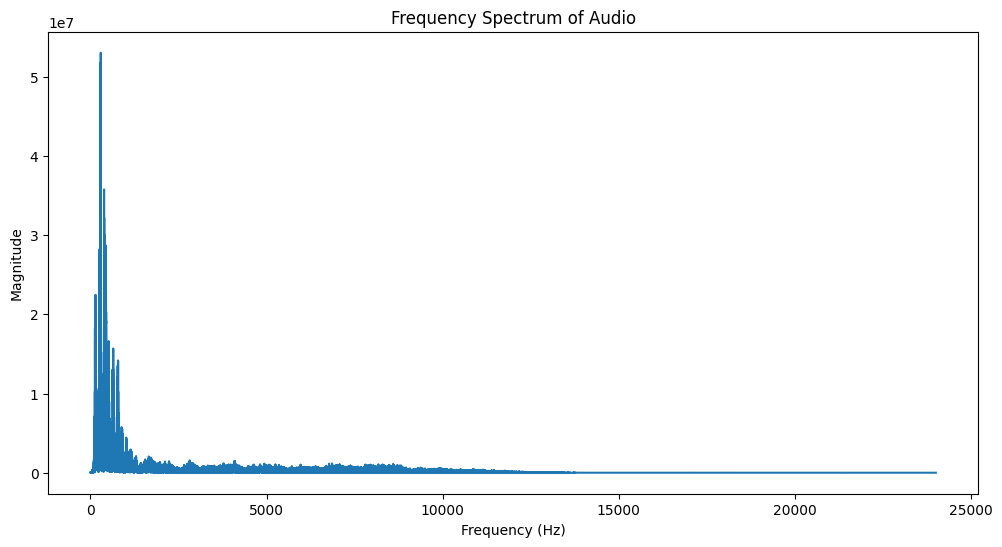

In [9]:
# Visualize Fourier Data
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fourier)[:len(fourier)//2])
plt.title('Frequency Spectrum of Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [10]:
# Locate Dominant Frequency
magnitude = np.abs(fourier)
dominant_frequency_index = np.argmax(magnitude[:len(magnitude)//2])  # Only first half due to symmetry
dominant_frequency = frequencies[dominant_frequency_index]
print(f"Dominant frequency: {dominant_frequency} Hz")

Dominant frequency: 293.28561690524884 Hz


In [11]:
# Shift the Frequency (Preping Dolphin Attack) [+20 kHz (Ultrasonic)]
shifted_frequency_index = dominant_frequency_index + int(20000 / (sampling_rate / len(audio_data)))
shifted_fourier = np.zeros_like(fourier, dtype=complex)
if shifted_frequency_index < len(fourier):
    shifted_fourier[shifted_frequency_index] = fourier[dominant_frequency_index]

shifted_audio_data = np.fft.ifft(shifted_fourier).real

# Normalize shifted_audio_data to avoid clipping
shifted_audio_data = np.int16(shifted_audio_data / np.max(np.abs(shifted_audio_data)) * 32767)

wavfile.write('shifted_audio.wav', sampling_rate, shifted_audio_data.astype(np.int16))

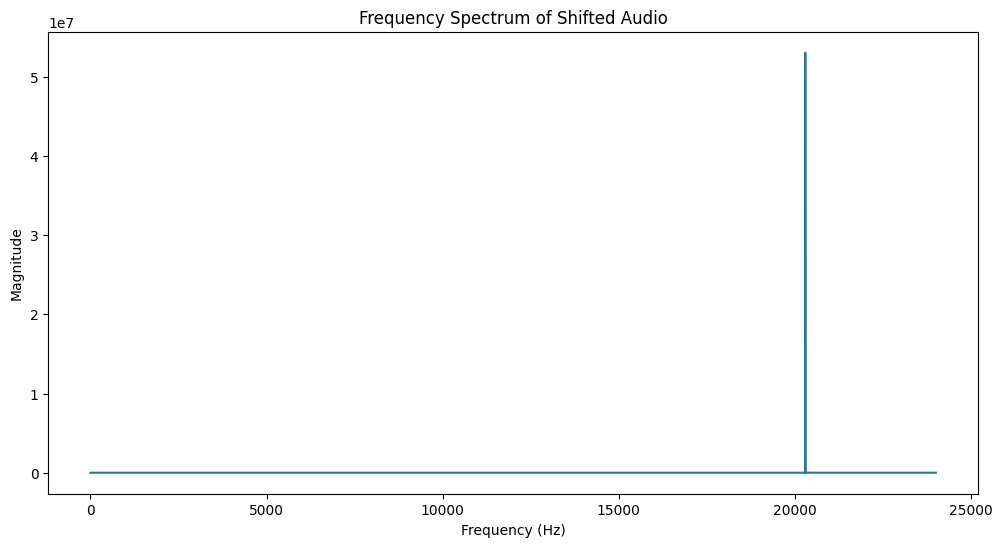

In [12]:
# Plot Shifted Frequency Data
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(shifted_fourier)[:len(shifted_fourier)//2])
plt.title('Frequency Spectrum of Shifted Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()